<h2 style="color:blue" align="center">Handwritten digits classification using neural network</h2>

In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
len(X_train)

60000

In [ ]:
len(X_test)

10000

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train[0].shape


(28, 28)

In [ ]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [ ]:
for row in X_train[0]:
  row=row.tolist()
  for i in row:
    print(str(i).ljust(4), end='')
  print()

0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   3   18  18  18  126 136 175 26  166 255 247 127 0   0   0   0   
0   0   0   0   0   0   0   0   30  36  94  154 170 253 253 253 253 253 225 172 253 242 195 64  0   0   0   0   
0   0   0   0   0   0   0   49  238 253 253 253 253 253 253 253 253 251 93  82  82  56  39  0   0   0   0   0   
0   0   0   0   0   0   0   18  219 253 253 253 253 253 198 182 247 241 0   0   0   0   0   0   

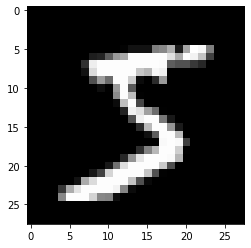

In [ ]:
plt.imshow(X_train[0],cmap='gray') #RGB---BGR

In [ ]:
y_train[0]

5

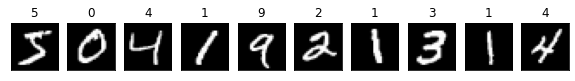

In [ ]:
# Display some images
fig, axes = plt.subplots(ncols=10, sharex=False, 
    sharey=True, figsize=(10, 4))
for i in range(10):
    axes[i].set_title(y_train[i])
    axes[i].imshow(X_train[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

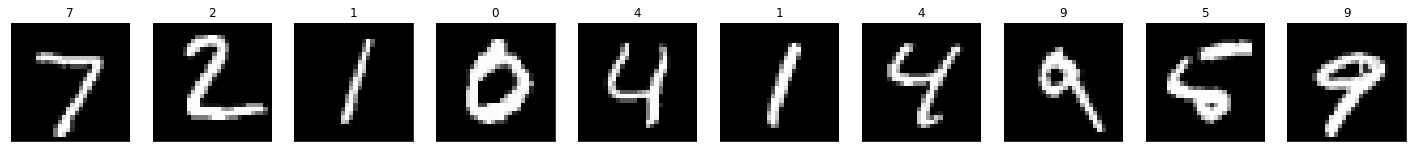

In [8]:
# Display some images
fig, axes = plt.subplots(ncols=10, sharex=False, 
    sharey=True, figsize=(25, 12))
for i in range(10):
    axes[i].set_title(y_test[i])
    axes[i].imshow(X_test[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

In [ ]:
X_train = X_train / 255 #0--255=> 0--1
X_test = X_test / 255

In [ ]:
for row in X_train[0]:
  row=row.tolist()
  for i in row:
    print(str(round(i,2)).ljust(4), end='')
  print()

0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.010.070.070.070.490.530.690.1 0.651.0 0.970.5 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.120.140.370.6 0.670.990.990.990.990.990.880.670.990.950.760.250.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.190.930.990.990.990.990.990.990.990.990.980.360.320.320.220.150.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.070.860.990.990.990.990.990.780.710.970.950.0 0.0 0.0 0.0 0.0 0.0 

In [ ]:
len(X_train)

60000

In [3]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [ ]:
X_train_flattened.shape

(60000, 784)

In [ ]:
X_train_flattened[0]

In [ ]:
model = keras.Sequential()
layer_1=keras.layers.Dense(10, input_shape=(784,), activation='softmax')
model.add(layer_1)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5,validation_data=(X_test_flattened,y_test),verbose=1)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4677 - accuracy: 0.8769 - val_loss: 0.3136 - val_accuracy: 0.9137
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3036 - accuracy: 0.9154 - val_loss: 0.2852 - val_accuracy: 0.9186
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2834 - accuracy: 0.9209 - val_loss: 0.2754 - val_accuracy: 0.9225
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2732 - accuracy: 0.9239 - val_loss: 0.2686 - val_accuracy: 0.9246
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2670 - accuracy: 0.9255 - val_loss: 0.2715 - val_accuracy: 0.9238


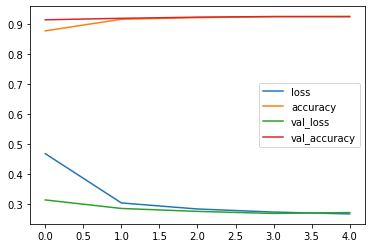

In [ ]:
import pandas as pd
losses = pd.DataFrame(model.history.history)


In [ ]:
losses

,loss,accuracy,val_loss,val_accuracy
0,0.467729,0.876867,0.313558,0.9137
1,0.303572,0.915417,0.285206,0.9186
2,0.283404,0.920917,0.275371,0.9225
3,0.273170,0.923917,0.268609,0.9246
4,0.267001,0.925517,0.271527,0.9238


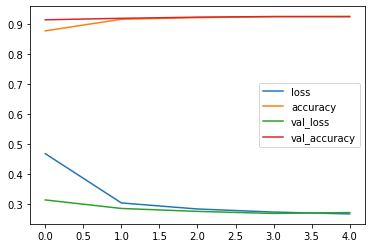

In [ ]:
losses.plot()

Epoch 1/5
1875/1875 [==============================] - 13s 6ms/step - loss: 2.2806 - accuracy: 0.8480 - val_loss: 0.4818 - val_accuracy: 0.8951
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3627 - accuracy: 0.9091 - val_loss: 0.3250 - val_accuracy: 0.9184
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2759 - accuracy: 0.9262 - val_loss: 0.2857 - val_accuracy: 0.9317
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2516 - accuracy: 0.9341 - val_loss: 0.2910 - val_accuracy: 0.9343
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2304 - accuracy: 0.9391 - val_loss: 0.2593 - val_accuracy: 0.9409


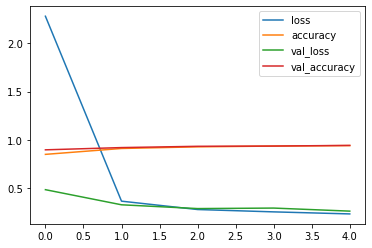

In [4]:
model = keras.Sequential()

layer_1=keras.layers.Dense(100, input_shape=(784,), activation='relu',name='layer_1')
model.add(layer_1)

layer_2=keras.layers.Dense(10, activation='softmax',name='output_layer')
model.add(layer_2)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5,validation_data=(X_test_flattened,y_test),verbose=1)
# to check loss and accuracy for test dataset --- model.evaluate(xtest,ytest)
import pandas as pd
losses = pd.DataFrame(model.history.history)
losses.plot()

In [5]:
model.history.history

{'loss': [2.2805862426757812,
  0.362689346075058,
  0.2759092450141907,
  0.2516060471534729,
  0.23040300607681274],
 'accuracy': [0.8480333089828491,
  0.9091166853904724,
  0.9261666536331177,
  0.9340500235557556,
  0.9391166567802429],
 'val_loss': [0.4817942976951599,
  0.32498010993003845,
  0.285739928483963,
  0.29095345735549927,
  0.259281188249588],
 'val_accuracy': [0.8950999975204468,
  0.91839998960495,
  0.9316999912261963,
  0.9343000054359436,
  0.9409000277519226]}

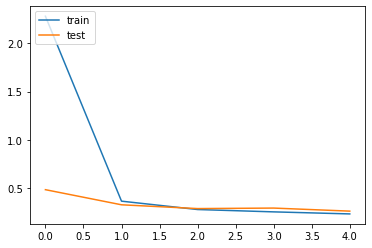

In [9]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.legend(['train', 'test'], loc='upper left')

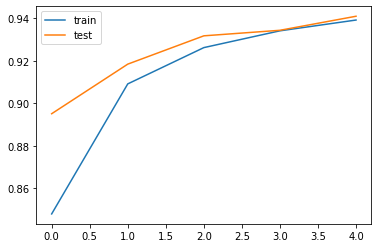

In [10]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.legend(['train', 'test'], loc='upper left')

In [11]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2593 - accuracy: 0.9409


[0.259281188249588, 0.9409000277519226]

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


<h3 style='color:purple'>Using Flatten layer so that we don't have to call .reshape on input dataset</h3>

In [14]:
y_pred=model.predict(X_test_flattened)
y_pred

313/313 [==============================] - 1s 3ms/step


array([[1.7015293e-12, 7.7650343e-14, 1.2609851e-07, ..., 9.9998599e-01,
        5.1781223e-12, 6.0555387e-11],
       [1.4598444e-06, 3.1961534e-11, 9.9926662e-01, ..., 2.0032587e-04,
        6.0491033e-08, 8.9538537e-30],
       [2.7486558e-15, 9.9999982e-01, 3.8304961e-08, ..., 2.3927299e-10,
        1.0438267e-09, 1.0247936e-13],
       ...,
       [2.6785605e-12, 1.9680258e-12, 2.0936853e-13, ..., 5.7492269e-09,
        1.6859682e-05, 7.6425300e-07],
       [1.1868822e-14, 3.1956488e-20, 2.2200359e-15, ..., 9.8349109e-22,
        9.9511588e-12, 1.1266958e-15],
       [8.3146048e-08, 6.1184321e-31, 2.8107030e-07, ..., 1.5761192e-12,
        6.4894259e-09, 7.6624138e-09]], dtype=float32)

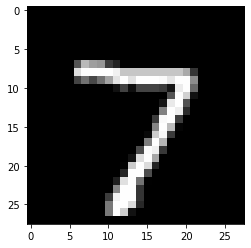

In [15]:
plt.imshow(X_test[0],cmap='gray')

In [16]:
y_test[0]

7

In [17]:
y_pred[0]

array([1.7015293e-12, 7.7650343e-14, 1.2609851e-07, 1.3855857e-05,
       8.1703739e-15, 2.5438194e-13, 3.6178906e-20, 9.9998599e-01,
       5.1781223e-12, 6.0555387e-11], dtype=float32)

In [19]:
np.argmax(y_pred[0])

7

In [20]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [25]:
y_pred_10=y_pred[0:10]

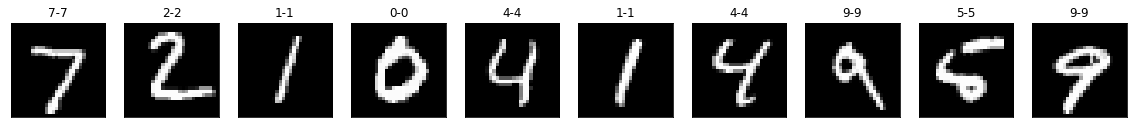

In [29]:
# Display some images
fig, axes = plt.subplots(ncols=10, sharex=False, 
    sharey=True, figsize=(20, 10))
for i in range(10):
    axes[i].set_title(str(y_test[i])+"-"+str(np.argmax(y_pred_10[i])))
    axes[i].imshow(X_test[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

In [30]:
final_y_predicted=np.argmax(y_pred,axis=1)
final_y_predicted

array([7, 2, 1, ..., 4, 5, 6])

In [31]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=final_y_predicted)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    0,    0,    0,    2,    4,    1,    8,    1],
       [   0, 1119,    4,    4,    0,    1,    1,    2,    4,    0],
       [  16,    3,  947,   12,    6,    0,    2,   12,   32,    2],
       [  10,    0,    7,  947,    1,    7,    0,    4,   27,    7],
       [   2,    0,    4,    0,  929,    0,    2,    0,    9,   36],
       [  10,    2,    0,   30,    2,  810,    4,    3,   20,   11],
       [  16,    3,    4,    0,    9,   18,  893,    0,   15,    0],
       [   2,   10,   14,   12,    6,    0,    0,  957,    4,   23],
       [   7,    2,    4,   15,   10,   16,    1,    3,  902,   14],
       [   9,    5,    0,   17,   21,    2,    0,    6,    8,  941]],
      dtype=int32)>

Text(111.5, 0.5, 'Actual  digit')

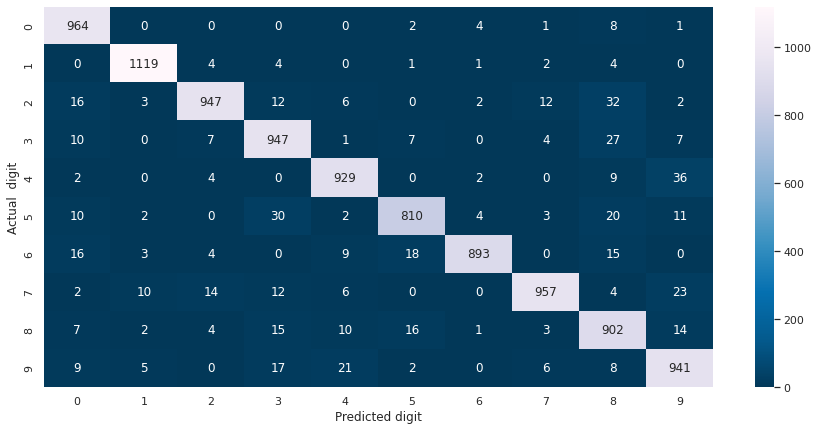

In [32]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15,7)})
sns.heatmap(cm,annot=True,cmap='PuBu_r',fmt='g')
plt.xlabel("Predicted digit")
plt.ylabel("Actual  digit") 